# Section: Financial Data
## from Python For Finance: Analyze Big Financial Data

In [95]:
import pandas_datareader.data as web
import datetime
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
%matplotlib inline

In [43]:
end = datetime.datetime(2014,9,26)
start = datetime.datetime(2000,1,1)

DAX = web.DataReader(name="^GDAXI", data_source='yahoo', start=start, end=end)

In [44]:
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3786 entries, 2000-01-03 to 2014-09-26
Data columns (total 6 columns):
Open         3748 non-null float64
High         3748 non-null float64
Low          3748 non-null float64
Close        3748 non-null float64
Adj Close    3748 non-null float64
Volume       3748 non-null float64
dtypes: float64(6)
memory usage: 207.0 KB


In [45]:
# remove rows with NA values
DAX = DAX.dropna()
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3748 entries, 2000-01-03 to 2014-09-26
Data columns (total 6 columns):
Open         3748 non-null float64
High         3748 non-null float64
Low          3748 non-null float64
Close        3748 non-null float64
Adj Close    3748 non-null float64
Volume       3748 non-null float64
dtypes: float64(6)
memory usage: 205.0 KB


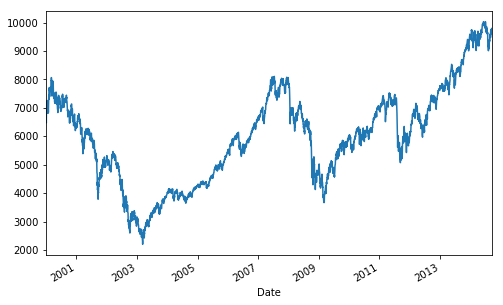

In [47]:
DAX['Close'].plot(figsize=(8,5))

In [48]:
DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1183a0b00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118c858d0>], dtype=object)

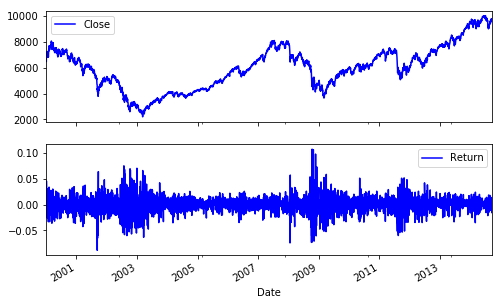

In [49]:
DAX[['Close', 'Return']].plot(subplots=True, style='b', figsize=(8,5))

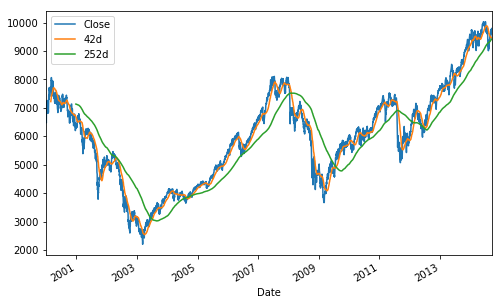

In [50]:
# DAX['42d'] = pd.rolling_mean(DAX['Close'], window=42)
# DAX['252d'] = pd.rolling_mean(DAX['Close'], window=252)
DAX['42d'] = DAX['Close'].rolling(window=42).mean()
DAX['252d'] = DAX['Close'].rolling(window=252).mean()
DAX[['Close', '42d', '252d']].plot(figsize=(8,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1184ab710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119394f98>], dtype=object)

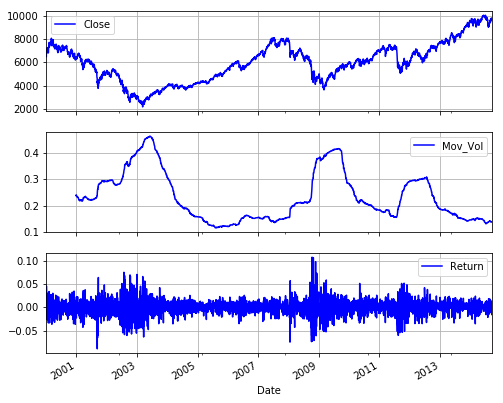

In [52]:
DAX['Mov_Vol'] = DAX['Return'].rolling(window=252).std() * np.sqrt(252)
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b', figsize=(8,7), grid=True)

# Section: Regression Analysis
## from Python For Finance: Analyze Big Financial Data

In [56]:
import requests

In [65]:
es_url = "http://www.stoxx.com/download/historical_values/hbrbcpe.txt"
vs_url = "http://www.stoxx.com/download/historical_values/h_vstoxx.txt"

es = requests.get(es_url)
es_file = open("./data/es50.txt", 'w')
es_file.write(es.text)
es_file.close()

vs = requests.get(vs_url)
vs_file = open("./data/vs.txt", 'w')
vs_file.write(vs.text)
vs_file.close

<function TextIOWrapper.close>

In [66]:
!ls -o ./data/*.txt

-rw-r--r--@ 1 glenn  688500 Jul 10 19:52 ./data/es50.txt
-rw-r--r--@ 1 glenn  363485 Jul 10 19:52 ./data/vs.txt


In [68]:
lines = open("./data/es50.txt", 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

## Cleaning the es50.txt file:

In [70]:
lines[:6]
for line in lines[3883:3890]:
    print(line[41:])

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;



In [74]:
new_file = open("./data/es50.txt", 'w')
new_file.writelines('date' + lines[3][:-1] + ';DEL' + lines[3][-1])
new_file.writelines(lines[4:])
new_file.close()

In [77]:
es = pd.read_csv('./data/es50.txt', index_col=0, parse_dates=True, sep=";", dayfirst=True)
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


In [78]:
del es['DEL']

In [79]:
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [81]:
# Can import the EURO STOXX 50 directly
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True, sep=";", dayfirst=True, header=None, skiprows=4, names=cols)
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [83]:
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [84]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2, parse_dates=True, sep=',', dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [86]:
data = pd.DataFrame({'EUROSTOXX': es['SX5E'][es.index > datetime.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX': vs['V2TX'][vs.index > datetime.datetime(1999, 1, 1)]}))
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4554 entries, 1999-01-04 to 2016-10-04
Data columns (total 2 columns):
EUROSTOXX    4554 non-null float64
VSTOXX       4554 non-null float64
dtypes: float64(2)
memory usage: 266.7 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ccca710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1195b36a0>], dtype=object)

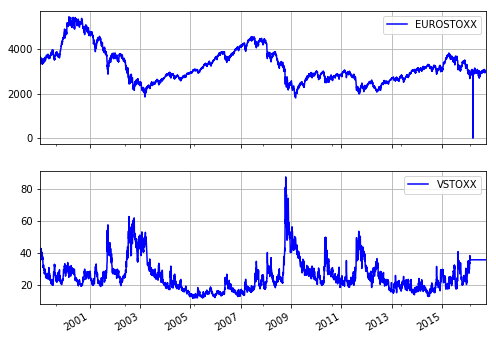

In [87]:
data.plot(subplots=True, grid=True, style='b', figsize=(8,6))

In [88]:
rets = np.log(data / data.shift(1))
rets.head()

/Users/glenn/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11cccbef0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118893b00>], dtype=object)

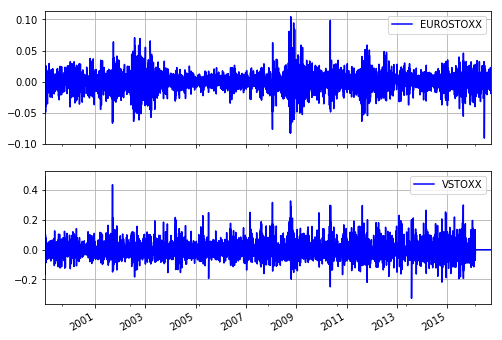

In [89]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8,6))

### TODO: Build least squares model. Code in book does not work so need to find updated way to do this.

In [96]:

xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']
model = sm.ols(y=ydat, x=xdat)
model

TypeError: from_formula() missing 2 required positional arguments: 'formula' and 'data'

In [100]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.724945
VSTOXX,-0.724945,1.000000


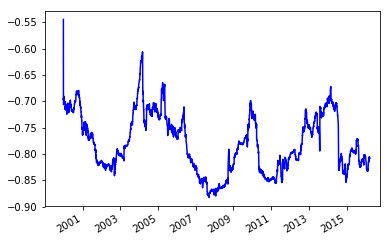

In [104]:
rets['EUROSTOXX'].rolling(window=252).corr(rets['VSTOXX']).plot(style='b')
# pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'], window=252).plot(grid=True, style='b')